## Minimax ReLU bug fix

python emulator로 알고리즘 확인. 

### GUESS
1. Remez Algorithm의 적정성 여부  
2. Composition이 제대로 되었는지  


1. Remez algorithm은 continuous 함수에 대해 작동하므로 sign()의 근사에 적합하지 않을 수 있음. -> 그럼 대상 함수를 sign()이 아니라 relu()로 바꾸면 됨.   
2. input range가 [-1,1]이 아닐 경우 Chebysehv basis를 scale하여야함. $T'_i(x) = T_i(x/w)$, where $w > 1$.
3. Composition??

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
from hemul.comparator_fhe import ApprRelu_FHE
from hemul.comparator import ApprRelu

In [3]:
def relu(x):
    x[x<0] =0
    return x

functions set
degrees = [15, 15, 15, 15], margin = 0.01, eps = 0.02


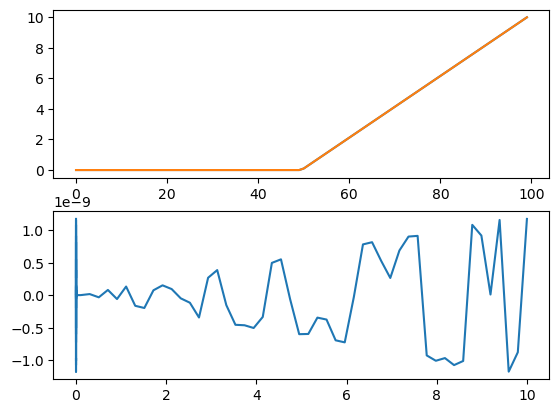

In [4]:
appr_relu = ApprRelu(xmin=-10, xmax=10, min_depth=True, alpha=12)
xx = np.linspace(-10,10,100)
out1 = appr_relu(xx)
gt = relu(xx)
fig, axs = plt.subplots(2)
axs[0].plot(out1, label="apprx")
axs[0].plot(gt, label="gt")
axs[1].plot(xx, gt - out1)

alpha = 12면 예상 에러값은..? 2-(12)보다 훨씬 작네?

# FHE 버전

In [5]:
import hemul
hemul.USE_FPGA=False
from hemul import heaan

ImportError: /home/hoseung/Work/FHE/FHE_simulator/hemul/HEAAN.cpython-310-x86_64-linux-gnu.so: undefined symbol: _ZTI10Ciphertext

In [6]:
from hemul.context import set_all

cwd =  /home/hoseung/Work/FHE/MuxConv/scripts
binding to HEAAN


ImportError: cannot import name 'Encoder' from 'hemul.base_heaan' (/home/hoseung/Work/FHE/FHE_simulator/hemul/base_heaan.py)

In [23]:
logp = 30
logq = 800
logn = 15

# Rotation 미리 준비 
rot_l = [2**i for i in range(15)]
rot_l = rot_l + [2**15-1, 
                 2**15-33, 2**15-32, 2**15-31,
                 2**15-17, 2**15-16, 2**15-15, 
                 2**15-9,2**15-8, 2**15-7] + [3,5,7,9,15,17, 31, 33]

hec = heaan.HEAANContext(logn, logp, logq, load_keys=True, rot_l=rot_l)

Initializing the scheme as the data owner
Loading a secret key from:  ./SecretKey.txt
loading secret key done.
HEAAN CKKS setup is ready 


In [ ]:
appr = ApprRelu_FHE(hec, xmin=-10, xmax=10, min_depth=True)

In [26]:
ctxt = hec.encrypt(xx)

activated = appr(ctxt)
print(activated._arr)

functions set
degrees = [15, 15, 15, 15], margin = 0.01, eps = 0.02


AttributeError: 'HEAANContext' object has no attribute 'copy'

In [ ]:
np.all(np.isclose(out1,activated._arr))